In [275]:
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import scipy.stats as stats
import pandas as pd

from IPython.display import Video

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve


import modeling as md
import wrangle as wr
import exploration as exp
import acquire
import prepare
import split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
zillow = acquire.get_zillow_data()
zillow.head()

,Unnamed: 0,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,...,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,id.1,logerror,transactiondate
0,0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1727539,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,0,0.025595,2017-01-01
1,1,17052889,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1387261,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,1,0.055619,2017-01-01
2,2,14186244,NaN,NaN,NaN,NaN,NaN,NaN,261.0,11677,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,2,0.005383,2017-01-01
3,3,12177905,NaN,NaN,2.0,NaN,NaN,NaN,261.0,2288172,...,Single Family Residential,NaN,NaN,NaN,Central,NaN,NaN,3,-0.103410,2017-01-01
4,4,12095076,NaN,NaN,2.0,NaN,NaN,1.0,261.0,781532,...,Single Family Residential,Central,NaN,NaN,Central,NaN,NaN,6,-0.001011,2017-01-01


In [3]:
zillow = wr.handle_missing_values(zillow)
zillow.columns

Index(['Unnamed: 0', 'parcelid', 'propertylandusetypeid', 'id', 'bathroomcnt',
       'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'propertylandusedesc', 'id.1',
       'logerror', 'transactiondate'],
      dtype='object')

In [4]:
cols_to_drop = ['id', 'calculatedbathnbr', 'finishedsquarefeet12', 'propertycountylandusecode', 'propertylandusetypeid',
                'taxamount', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'id']
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   parcelid                      52442 non-null  int64  
 2   propertylandusetypeid         52442 non-null  float64
 3   id                            52442 non-null  int64  
 4   bathroomcnt                   52442 non-null  float64
 5   bedroomcnt                    52442 non-null  float64
 6   calculatedbathnbr             52305 non-null  float64
 7   calculatedfinishedsquarefeet  52360 non-null  float64
 8   finishedsquarefeet12          52195 non-null  float64
 9   fips                          52442 non-null  float64
 10  fullbathcnt                   52305 non-null  float64
 11  latitude                      52442 non-null  float64
 12  longitude                     52442 non-null  float64
 13  l

In [5]:
zillow = zillow.drop(columns=cols_to_drop)
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   parcelid                      52442 non-null  int64  
 2   bathroomcnt                   52442 non-null  float64
 3   bedroomcnt                    52442 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52442 non-null  float64
 6   fullbathcnt                   52305 non-null  float64
 7   latitude                      52442 non-null  float64
 8   longitude                     52442 non-null  float64
 9   lotsizesquarefeet             52073 non-null  float64
 10  rawcensustractandblock        52442 non-null  float64
 11  regionidcity                  51405 non-null  float64
 12  regionidcounty                52442 non-null  float64
 13  r

In [6]:
zillow = zillow.dropna()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50875 entries, 0 to 52441
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    50875 non-null  int64  
 1   parcelid                      50875 non-null  int64  
 2   bathroomcnt                   50875 non-null  float64
 3   bedroomcnt                    50875 non-null  float64
 4   calculatedfinishedsquarefeet  50875 non-null  float64
 5   fips                          50875 non-null  float64
 6   fullbathcnt                   50875 non-null  float64
 7   latitude                      50875 non-null  float64
 8   longitude                     50875 non-null  float64
 9   lotsizesquarefeet             50875 non-null  float64
 10  rawcensustractandblock        50875 non-null  float64
 11  regionidcity                  50875 non-null  float64
 12  regionidcounty                50875 non-null  float64
 13  r

In [7]:
df = acquire.get_zillow_data()
df.head()

,Unnamed: 0,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,...,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc,id.1,logerror,transactiondate
0,0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1727539,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,0,0.025595,2017-01-01
1,1,17052889,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1387261,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,1,0.055619,2017-01-01
2,2,14186244,NaN,NaN,NaN,NaN,NaN,NaN,261.0,11677,...,Single Family Residential,NaN,NaN,NaN,NaN,NaN,NaN,2,0.005383,2017-01-01
3,3,12177905,NaN,NaN,2.0,NaN,NaN,NaN,261.0,2288172,...,Single Family Residential,NaN,NaN,NaN,Central,NaN,NaN,3,-0.103410,2017-01-01
4,4,12095076,NaN,NaN,2.0,NaN,NaN,1.0,261.0,781532,...,Single Family Residential,Central,NaN,NaN,Central,NaN,NaN,6,-0.001011,2017-01-01


In [8]:
df = wr.clean_zillow(df)
df

(       parcelid  bathroomcnt  bedroomcnt  sqr_ft         county  fullbathcnt  \
 0      14297519          3.5         4.0  3100.0  orange_county          3.0   
 1      17052889          1.0         2.0  1465.0        ventura          1.0   
 2      14186244          2.0         3.0  1243.0  orange_county          2.0   
 3      12177905          3.0         4.0  2376.0    los_angeles          3.0   
 4      12095076          3.0         4.0  2962.0    los_angeles          3.0   
 ...         ...          ...         ...     ...            ...          ...   
 52437  11000655          2.0         2.0  1286.0    los_angeles          2.0   
 52438  17239384          2.0         4.0  1612.0        ventura          2.0   
 52439  12773139          1.0         3.0  1032.0    los_angeles          1.0   
 52440  12826780          2.0         3.0  1762.0    los_angeles          2.0   
 52441  13083743          2.0         3.0  1050.0    los_angeles          2.0   
 
        latitude  longitud

In [9]:
df, quants, cats = wr.wrangle_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,sqr_ft,county,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,3.5,4.0,3100.0,orange_county,3.0,33634931,-117869207,4506.0,60590630,1998.0,485713.0,1023282.0,537569.0,11013.72,60590630072012,0.025595,2017-01-01
1,17052889,1.0,2.0,1465.0,ventura,1.0,34449266,-119281531,12647.0,61110010,1967.0,88000.0,464000.0,376000.0,5672.48,61110010023006,0.055619,2017-01-01
2,14186244,2.0,3.0,1243.0,orange_county,2.0,33886168,-117823170,8432.0,60590218,1962.0,85289.0,564778.0,479489.0,6488.30,60590218022012,0.005383,2017-01-01
3,12177905,3.0,4.0,2376.0,los_angeles,3.0,34245180,-118240722,13038.0,60373001,1970.0,108918.0,145143.0,36225.0,1777.51,60373001001006,-0.103410,2017-01-01
4,12095076,3.0,4.0,2962.0,los_angeles,3.0,34145202,-118179824,63000.0,60374608,1950.0,276684.0,773303.0,496619.0,9516.26,60374608001014,-0.001011,2017-01-01


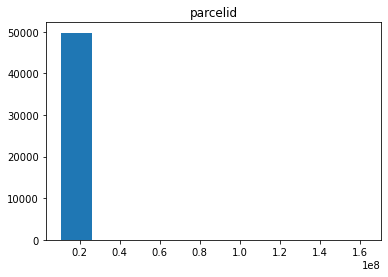

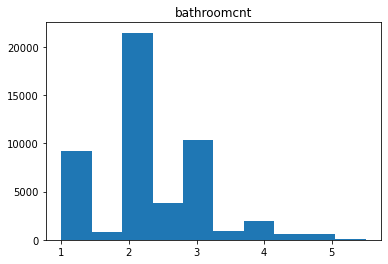

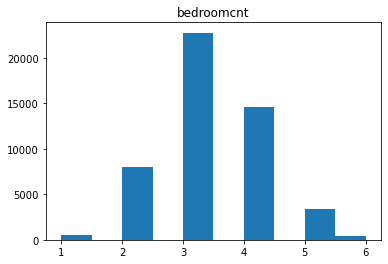

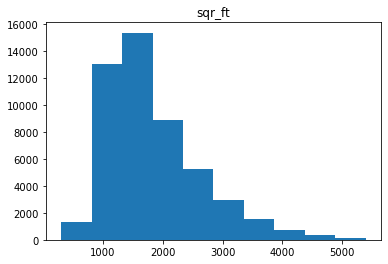

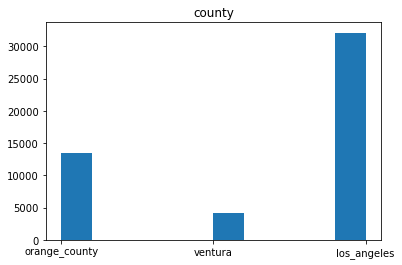

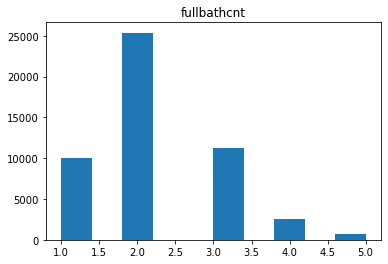

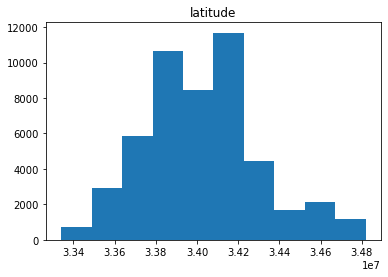

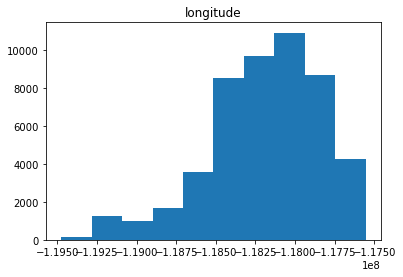

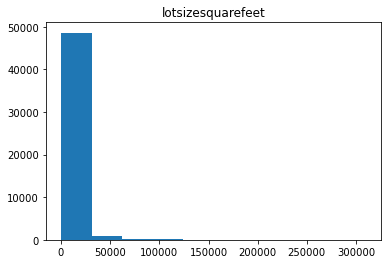

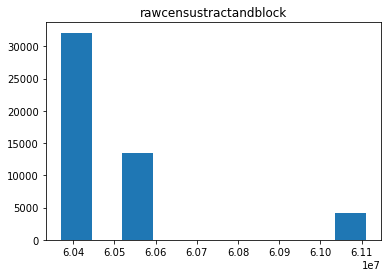

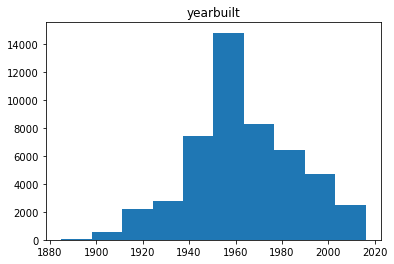

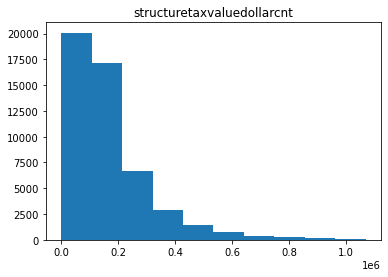

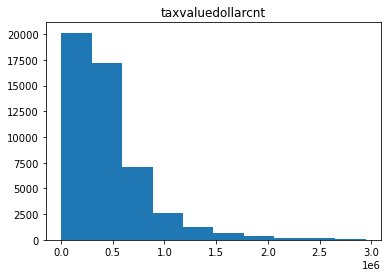

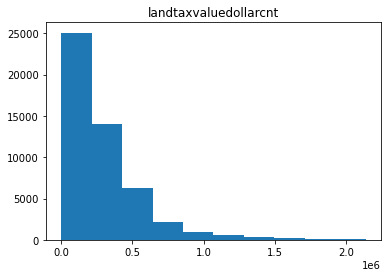

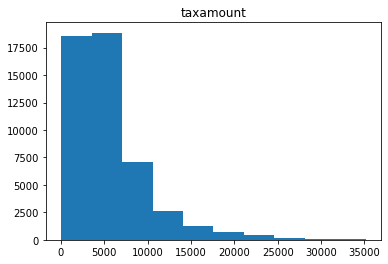

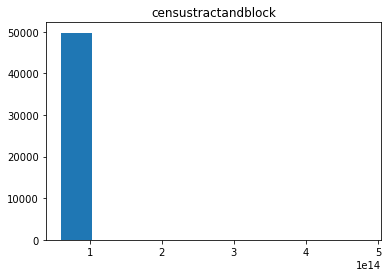

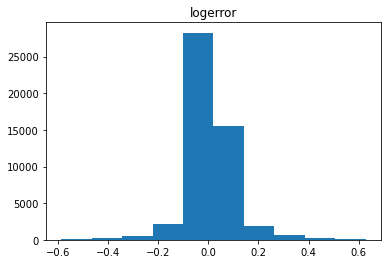

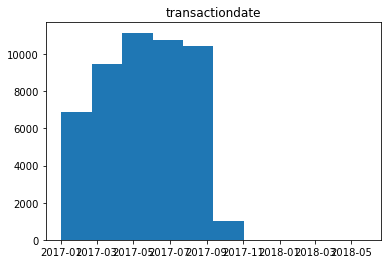

In [10]:

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [11]:
target_var = 'logerror'
train, validate, test = split.train_validate_test_split(df, target_var)

train.head()

,parcelid,bathroomcnt,bedroomcnt,sqr_ft,county,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
32790,14445049,2.5,3.0,1644.0,orange_county,2.0,33418579,-117592108,1936.0,60590421,1977.0,121528.0,533006.0,411478.0,5413.88,60590421143003,0.022185,2017-06-20
4871,11175359,2.0,3.0,1257.0,los_angeles,2.0,34507083,-118637434,5579.0,60379201,1987.0,123565.0,263831.0,140266.0,3906.56,60379201041036,0.000514,2017-02-01
22373,11312354,2.0,3.0,1420.0,los_angeles,2.0,34669483,-118073694,6861.0,60379005,1993.0,142135.0,177668.0,35533.0,2986.74,60379005081027,0.015747,2017-05-05
35440,11296958,3.0,5.0,2060.0,los_angeles,3.0,34688094,-118109331,8410.0,60379005,1957.0,163939.0,229270.0,65331.0,3523.28,60379005051004,0.054307,2017-06-30
41735,14160835,2.5,4.0,2665.0,orange_county,2.0,33922399,-117864326,5400.0,60590218,1980.0,229201.0,481476.0,252275.0,5566.52,60590218141008,0.019879,2017-07-28


In [12]:
df, quants, cats = wr.wrangle_zillow()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49772 entries, 0 to 52441
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   parcelid                    49772 non-null  int64         
 1   bathroomcnt                 49772 non-null  float64       
 2   bedroomcnt                  49772 non-null  float64       
 3   sqr_ft                      49772 non-null  float64       
 4   county                      49772 non-null  object        
 5   fullbathcnt                 49772 non-null  float64       
 6   latitude                    49772 non-null  int64         
 7   longitude                   49772 non-null  int64         
 8   lotsizesquarefeet           49772 non-null  float64       
 9   rawcensustractandblock      49772 non-null  int64         
 10  yearbuilt                   49772 non-null  float64       
 11  structuretaxvaluedollarcnt  49772 non-null  float64   

In [13]:
decoded_lat_lon = df[['latitude', 'longitude']] / 10**6
decoded_lat_lon

,latitude,longitude
0,33.634931,-117.869207
1,34.449266,-119.281531
2,33.886168,-117.823170
3,34.245180,-118.240722
4,34.145202,-118.179824
...,...,...
52437,34.245368,-118.282383
52438,34.300140,-118.706327
52439,34.040895,-118.038169
52440,33.937685,-117.996709


In [14]:
lat_lon_slices = wr.frames_of_100(decoded_lat_lon)
lat_lon_slices[0][1]

100

In [15]:
list_of_strings = []

len_of_slices = len(lat_lon_slices)
decoded_lat_lon['lat_lon_string'] = decoded_lat_lon.apply(lambda x: f'{x.latitude},{x.longitude}', axis=1)

for n in range(len_of_slices):
    list_of_strings.append(np.array(decoded_lat_lon.iloc[lat_lon_slices[n][0]:lat_lon_slices[n][1], 2]))
    list_of_strings[n] = "|".join(list_of_strings[n])
    if n % 496 == 0:
        print(n)
        

len(list_of_strings)

0
496


497

In [16]:
elevation_results = wr.request_elevation(decoded_lat_lon)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475


In [17]:
elevation_results[0]

total_dict = {'latitude': [], 'longitude': [], 'elevation': []}

for chunk in elevation_results:
    for coords in chunk:
        total_dict['latitude'].append(coords['latitude'])
        total_dict['longitude'].append(coords['longitude'])
        total_dict['elevation'].append(coords['elevation'])
    
print(len(total_dict['elevation']))

49671


In [18]:
coords_df = pd.DataFrame(total_dict)
coords_df.head()

,latitude,longitude,elevation
0,33.634931,-117.869207,70
1,34.449266,-119.281531,233
2,33.886168,-117.823170,106
3,34.245180,-118.240722,712
4,34.145202,-118.179824,340


In [19]:
comb_df = pd.concat([df.reset_index(), coords_df.elevation],axis=1)
comb_df[['latitude', 'longitude']] = comb_df[['latitude', 'longitude']] / 10**6
comb_df.head()

,index,parcelid,bathroomcnt,bedroomcnt,sqr_ft,county,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,elevation
0,0,14297519,3.5,4.0,3100.0,orange_county,3.0,33.634931,-117.869207,4506.0,60590630,1998.0,485713.0,1023282.0,537569.0,11013.72,60590630072012,0.025595,2017-01-01,70.0
1,1,17052889,1.0,2.0,1465.0,ventura,1.0,34.449266,-119.281531,12647.0,61110010,1967.0,88000.0,464000.0,376000.0,5672.48,61110010023006,0.055619,2017-01-01,233.0
2,2,14186244,2.0,3.0,1243.0,orange_county,2.0,33.886168,-117.823170,8432.0,60590218,1962.0,85289.0,564778.0,479489.0,6488.30,60590218022012,0.005383,2017-01-01,106.0
3,3,12177905,3.0,4.0,2376.0,los_angeles,3.0,34.245180,-118.240722,13038.0,60373001,1970.0,108918.0,145143.0,36225.0,1777.51,60373001001006,-0.103410,2017-01-01,712.0
4,4,12095076,3.0,4.0,2962.0,los_angeles,3.0,34.145202,-118.179824,63000.0,60374608,1950.0,276684.0,773303.0,496619.0,9516.26,60374608001014,-0.001011,2017-01-01,340.0


In [20]:
comb_df=comb_df.dropna()
dummies = pd.get_dummies(comb_df.drop(columns=['censustractandblock', 'rawcensustractandblock']),
                                                columns=['county'],drop_first=True) 


dummies = dummies.drop(columns=['index', 'parcelid', 'transactiondate', 'logerror'])
dummies[['county_orange_county', 'county_ventura']] = dummies[['county_orange_county', 'county_ventura']].astype('float64')

In [21]:
train, validate, test = split.train_validate_test_split(dummies, 'logerror')
train.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,elevation,county_orange_county,county_ventura
48081,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,1925.0,157000.0,448000.0,291000.0,5473.56,247.0,0.0,0.0
27010,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,1946.0,84411.0,233331.0,148920.0,2960.95,293.0,0.0,0.0
24623,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,1962.0,171023.0,479446.0,308423.0,5949.30,279.0,0.0,0.0
14340,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,1981.0,295883.0,486526.0,190643.0,5115.90,103.0,1.0,0.0
44838,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,1957.0,90922.0,142382.0,51460.0,2011.07,148.0,0.0,0.0


In [22]:
scaler = MinMaxScaler()
scaled_train, scaled_validate, scaled_test, scaler = prepare.fit_and_scale(scaler, train, validate, test)

scaled_train.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,elevation,county_orange_county,county_ventura
0,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.305344,0.146923,0.151224,0.136425,0.154527,0.124436,0.0,0.0
1,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.465649,0.078929,0.078232,0.069779,0.082922,0.147516,0.0,0.0
2,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.587786,0.160058,0.161917,0.144597,0.168085,0.140492,0.0,0.0
3,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.732824,0.277014,0.164324,0.089350,0.144334,0.052183,1.0,0.0
4,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.549618,0.085028,0.047307,0.024063,0.055851,0.074762,0.0,0.0


In [23]:
def by_grp(X, i):
    return np.array(X.latitude[X.cluster_groups==i]), np.array(X.longitude[X.cluster_groups==i]), np.array(X.elevation[X.cluster_groups==i])
           



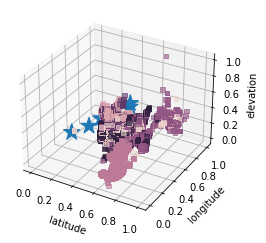

In [24]:
X= scaled_train
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

X['cluster_groups'] = kmeans.predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)

styles = ['o', 'x', '^', '*', '.', ',']
x, y, z = X.latitude, X.longitude, X.elevation
#for i, group in enumerate(X.cluster_groups.unique()):
#    x,y,z,c= by_grp(X, i)
#    ax.scatter(x,y,z, marker=styles[i], s=20, c=c, cmap=cmap, alpha=.6)
ax.scatter(x,y,z, marker='s', s=20,c=X.cluster_groups, cmap=cmap, alpha=.6)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],
           s = 300,
           marker='*', label = 'Centroid', alpha=1)

ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('elevation')
plt.show()




In [25]:
colors = ['b', 'g', 'r', 'y', 'purple', 'orange']
clusters = []
counties = []

for n in range(scaled_train.cluster_groups.nunique()):
    clusters.append(scaled_train[scaled_train.cluster_groups==n])
    cluster_1.head()
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
for i, cluster in enumerate(clusters):
    x, y, z = cluster.latitude, cluster.longitude, cluster.elevation
    ax.scatter(x,y, marker='s',c=colors[i], s=20, cmap=cmap, alpha=.6)



NameError: name 'cluster_1' is not defined

In [ ]:
for cluster in clusters:
    #print(cluster.county_orange_county.sum()) # clusters 2 & 6 (index 1 & 5)
    #print(cluster.county_ventura.sum()) # almost entirely cluster 1 ( index 0)
    print((cluster[(cluster.county_orange_county == 0) & (cluster.county_ventura == 0)].shape[0]))
    # clusters 3, 4, 5 (index 2, 3, 4)
    
orange_county = [1,5]
ventura_county = [0]
los_angeles = [2,3,4]

all_counties = [orange_county, ventura_county, los_angeles]
    

for i, county in enumerate(all_counties):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for j in county:
        x, y, z = clusters[j].latitude, clusters[j].longitude, clusters[j].elevation
        ax.scatter(x,y, marker='s',c=colors[j], s=20, cmap=cmap, alpha=.6)
    plt.show()

In [288]:
#Y = validate[['age', 'annual_income', 'spending_score']]
#Z = test[['age', 'annual_income', 'spending_score']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(dummies).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

<Figure size 648x432 with 0 Axes>

In [ ]:
border_dict = exp.county_borders(comb_df, 75)
grids, prices, lat_coords, lon_coords, sqr_ft, resolution, elevation, lotsizesqrft = exp.create_grids(border_dict,
                                                                             75,
                                                                             comb_df)

In [ ]:
los_angeles = exp.create_display_heatmap(prices, grids, lat_coords, lon_coords, sqr_ft, resolution, elevation, lotsizesqrft)[0]

In [ ]:
los_angeles

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(los_angeles.latitude)
y = np.array(los_angeles.longitude)
z = np.array(los_angeles.avg_elevation)


cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
points = ax.scatter(x,y,z, marker='s', c=los_angeles.price_per_sqr_ft, cmap=cmap, alpha=.7)
fig.colorbar(points)

ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('elevation')

"""

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
"""


plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_trisurf(x,y,z, linewidth=0, antialiased=False)
plt.show()

In [ ]:
counties = exp.create_display_heatmap(prices, grids, lat_coords, lon_coords, sqr_ft, resolution, elevation, lotsizesqrft, counties=['la', 'oc', 'ventura'])

In [ ]:
counties[0]

In [ ]:
counties[1]

In [ ]:
counties[2]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(counties[2].latitude)
y = np.array(counties[2].longitude)
z = np.array(counties[2].elevation)

los_angeles.price_per_sqr_ft.values

cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
points = ax.scatter(x,y,z, marker='s', c=counties[2].price_per_sqr_ft, cmap=cmap, alpha=.7)
fig.colorbar(points)

"""
f, ax = plt.subplots()
points = ax.scatter(x, y, c=z, s=50, cmap=cmap)
f.colorbar(points)
"""


ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('elevation')


# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)


plt.show()

In [ ]:
Video("los_angeles_ppsft.mov", width=480, height=640)

## Question: Is elevation related to price per square foot?

> >* continuous vs continuous PearsonR or spearman test for correlation

>> **Null** hypothesis: There is no significant relation between elevation and average price per square foot.

>> **Alternative** hypothesis: There is a significant relation between elevation and average price per square foot.

In [ ]:
train.head()

In [ ]:
bleh = bleh.dropna()

In [ ]:
#Y = validate[['age', 'annual_income', 'spending_score']]
#Z = test[['age', 'annual_income', 'spending_score']]
X.dropna()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(bleh).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
def by_grp(X, i):
    return np.array(X.latitude[X.cluster_groups==i]), np.array(X.longitude[X.cluster_groups==i]), np.array(X.avg_lotsizesqrft[X.cluster_groups==i]),\
           np.array(X.price_per_sqr_ft[X.cluster_groups==i])

In [289]:
X = counties[0][['latitude', 'longitude', 'avg_elevation', 'price_per_sqr_ft', 'avg_lotsizesqrft']]
X= X.dropna()
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

X['cluster_groups'] = kmeans.predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)

styles = ['o', 'x', '^', '*', '.', ',']
for i, group in enumerate(X.cluster_groups.unique()):
    x,y,z,c= by_grp(X, i)
    ax.scatter(x,y,z, marker=styles[i], s=20, c=c, cmap=cmap, alpha=.6)
#ax.scatter(x,y,z, marker='s', s=20,c=c, cmap=cmap, alpha=.6)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],
           s = 300,
           marker='*', label = 'Centroid', alpha=1)


ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('avg_elevation')

IndexError: list index out of range

In [ ]:
X.info()

# Scaled Data

### read data csv and convert date to datetime

In [80]:
df = pd.read_csv('zillow_with_elevation.csv').drop(columns='Unnamed: 0')
df.transactiondate = pd.to_datetime(df.transactiondate)

(49671, 19)

### Encode County

In [86]:
dummies = pd.get_dummies(df, columns=['county'], drop_first = True)
dummies['county']= df.county
dummies.shape

(49671, 21)

### train, validate, test splits

In [89]:
# MVP
train, validate, test = split.train_validate_test_split(dummies, 'logerror')
train.head()

,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,elevation,county_orange_county,county_ventura,county
48081,11031387,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,60371197,1925.0,...,448000.0,291000.0,5473.56,60371197002013,0.019189,2017-09-08,247.0,0,0,los_angeles
27010,11023688,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,60371045,1946.0,...,233331.0,148920.0,2960.95,60371045002006,0.009457,2017-06-01,293.0,0,0,los_angeles
24623,11056051,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,60371114,1962.0,...,479446.0,308423.0,5949.30,60371114001003,-0.015265,2017-05-23,279.0,0,0,los_angeles
14340,14409471,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,60590320,1981.0,...,486526.0,190643.0,5115.90,60590320611003,0.017980,2017-03-31,103.0,1,0,orange_county
44838,12915171,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,60374058,1957.0,...,142382.0,51460.0,2011.07,60374058002009,-0.008801,2017-08-24,148.0,0,0,los_angeles


In [90]:
train.shape

(27815, 21)

### Scale train, validate and test

In [91]:
scaler = MinMaxScaler()
scaled_train, scaled_validate, scaled_test, scaler = prepare.fit_and_scale(scaler, train, validate, test)
scaled_train.head()

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'sqr_ft', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustractandblock',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'elevation', 'county_orange_county', 'county_ventura'],
      dtype='object')


,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,elevation,county_orange_county,county_ventura
0,0.002099,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.000252,0.305344,0.146923,0.151224,0.136425,0.154527,0.000252,0.499278,0.124436,0.0,0.0
1,0.002048,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.000046,0.465649,0.078929,0.078232,0.069779,0.082922,0.000046,0.491275,0.147516,0.0,0.0
2,0.002261,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.000139,0.587786,0.160058,0.161917,0.144597,0.168085,0.000139,0.470945,0.140492,0.0,0.0
3,0.024287,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.296732,0.732824,0.277014,0.164324,0.089350,0.144334,0.296733,0.498284,0.052183,1.0,0.0
4,0.014472,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.004123,0.549618,0.085028,0.047307,0.024063,0.055851,0.004123,0.476260,0.074762,0.0,0.0


# End function

In [247]:
train, validate, test, train_scaled, validate_scaled,\
test_scaled, scaler = wr.load_wrangle_zillow_with_elevation()
train.head()

parcelid
bathroomcnt
bedroomcnt
sqr_ft
fullbathcnt
latitude
longitude
lotsizesquarefeet
rawcensustractandblock
yearbuilt
structuretaxvaluedollarcnt
taxvaluedollarcnt
landtaxvaluedollarcnt
taxamount
censustractandblock
logerror
elevation
days_since_2016
county_orange_county
county_ventura


,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,elevation,days_since_2016,county_orange_county,county_ventura,county
48081,11031387,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,60371197,1925.0,...,291000.0,5473.56,60371197002013,0.019189,2017-09-08,247.0,-616.0,0,0,los_angeles
27010,11023688,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,60371045,1946.0,...,148920.0,2960.95,60371045002006,0.009457,2017-06-01,293.0,-517.0,0,0,los_angeles
24623,11056051,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,60371114,1962.0,...,308423.0,5949.30,60371114001003,-0.015265,2017-05-23,279.0,-508.0,0,0,los_angeles
14340,14409471,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,60590320,1981.0,...,190643.0,5115.90,60590320611003,0.017980,2017-03-31,103.0,-455.0,1,0,orange_county
44838,12915171,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,60374058,1957.0,...,51460.0,2011.07,60374058002009,-0.008801,2017-08-24,148.0,-601.0,0,0,los_angeles


In [248]:
train_scaled.head()

,index,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,elevation,days_since_2016,county_orange_county,county_ventura,index,logerror
0,0,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.000252,0.305344,...,0.151224,0.136425,0.154527,0.000252,0.124436,0.042146,0.0,0.0,48081,0.019189
1,1,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.000046,0.465649,...,0.078232,0.069779,0.082922,0.000046,0.147516,0.421456,0.0,0.0,27010,0.009457
2,2,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.000139,0.587786,...,0.161917,0.144597,0.168085,0.000139,0.140492,0.455939,0.0,0.0,24623,-0.015265
3,3,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.296732,0.732824,...,0.164324,0.089350,0.144334,0.296733,0.052183,0.659004,1.0,0.0,14340,0.017980
4,4,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.004123,0.549618,...,0.047307,0.024063,0.055851,0.004123,0.074762,0.099617,0.0,0.0,44838,-0.008801


# let's make clusters

In [233]:
room_and_price = md.make_clusters(train_scaled, 6, col_list=['bathroomcnt', 'bedroomcnt', 'fullbathcnt', 'taxvaluedollarcnt'])
#for room in room_and_price:
#    print(room.cluster_groups.unique(),scaler.inverse_transform(room.taxvaluedollarcnt.mean())


In [294]:
lat_lon_elevation_price = md.make_clusters(train_scaled, 6, title='location', col_list=['latitude', 'longitude', 'elevation', 'logerror'])

#for cluster in lat_lon_elevation_price:
#    print(f'cluster {cluster.cluster_groups.unique()}, mean price: {exp.return_inverse_scaled_mean(scaler, "taxvaluedollarcnt", train, cluster)}')

AttributeError: 'DataFrame' object has no attribute 'cluster_groups'

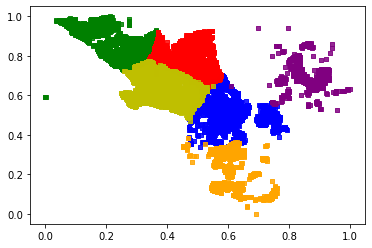

In [242]:
exp.graph_list_of_clusters(lat_lon_elevation_price, different_plots=False)


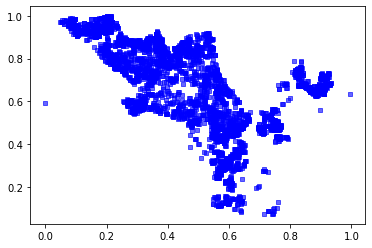

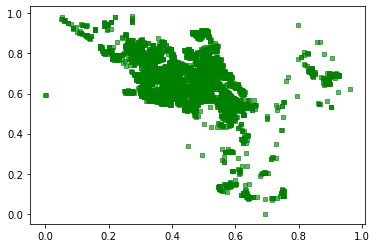

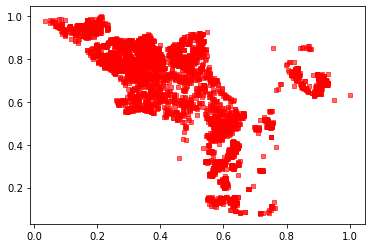

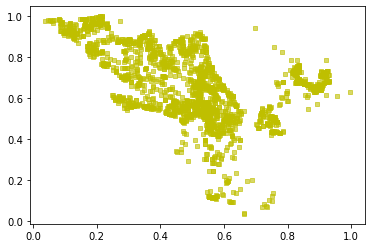

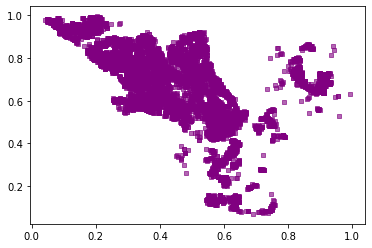

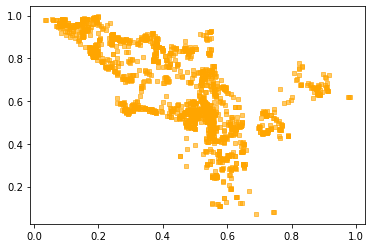

In [236]:
exp.graph_list_of_clusters(room_and_price, different_plots=True)

In [293]:
cluster_subgroups = {
    'basic_features': ['bathroomcnt', 'bedroomcnt', 'fullbathcnt'],
    'square_footage': ['sqr_ft', 'lotsizesquarefeet'],
    'coordinates': ['latitude', 'longitude', 'elevation'],
    'days': ['days_since_2016'],
    'yearbuilt': ['yearbuilt'],
    'taxes': ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'],
    'logerror': ['logerror']
}

for key, value in cluster_subgroups.items():
    cluster_subgroups[key] = md.make_clusters(train_scaled, 6, title=key,col_list=value,total_df=True)
    
cluster_subgroups['basic_features']

,bathroomcnt,bedroomcnt,fullbathcnt,latitude,longitude,elevation,basic_features_cluster_groups
0,0.444444,0.6,0.50,0.596649,0.539088,0.124436,1
1,0.000000,0.2,0.00,0.616556,0.541647,0.147516,2
2,0.222222,0.6,0.25,0.618695,0.504846,0.140492,3
3,0.444444,0.4,0.50,0.127372,0.941729,0.052183,5
4,0.222222,0.4,0.25,0.513800,0.809731,0.074762,0
...,...,...,...,...,...,...,...
27810,0.000000,0.4,0.00,0.380853,0.575936,0.014049,2
27811,0.000000,0.2,0.00,0.632256,0.532785,0.160060,2
27812,0.333333,0.6,0.25,0.197682,0.935520,0.079779,3
27813,0.222222,0.6,0.25,0.467766,0.895063,0.119920,3


In [262]:
cluster_subgroups['square_footage']

,sqr_ft,lotsizesquarefeet,latitude,longitude,elevation,square_footage_cluster_groups
0,0.405651,0.033466,0.596649,0.539088,0.124436,3
1,0.088125,0.024850,0.616556,0.541647,0.147516,2
2,0.253507,0.027084,0.618695,0.504846,0.140492,0
3,0.515708,0.093806,0.127372,0.941729,0.052183,1
4,0.134756,0.023570,0.513800,0.809731,0.074762,2
...,...,...,...,...,...,...
27810,0.167951,0.018867,0.380853,0.575936,0.014049,2
27811,0.104327,0.031685,0.632256,0.532785,0.160060,2
27812,0.302905,0.016772,0.197682,0.935520,0.079779,0
27813,0.242640,0.022789,0.467766,0.895063,0.119920,0


In [263]:
all_subgroups_df = pd.DataFrame()

for key,value in cluster_subgroups.items():
    all_subgroups_df = pd.concat([all_subgroups_df, value], axis=1)
all_subgroups_df.head()

,bathroomcnt,bedroomcnt,fullbathcnt,latitude,longitude,elevation,basic_features_cluster_groups,sqr_ft,lotsizesquarefeet,latitude,...,landtaxvaluedollarcnt,latitude,longitude,elevation,taxes_cluster_groups,logerror,latitude,longitude,elevation,logerror_cluster_groups
0,0.444444,0.6,0.50,0.596649,0.539088,0.124436,2,0.405651,0.033466,0.596649,...,0.136425,0.596649,0.539088,0.124436,2,0.019189,0.596649,0.539088,0.124436,1
1,0.000000,0.2,0.00,0.616556,0.541647,0.147516,0,0.088125,0.024850,0.616556,...,0.069779,0.616556,0.541647,0.147516,0,0.009457,0.616556,0.541647,0.147516,1
2,0.222222,0.6,0.25,0.618695,0.504846,0.140492,4,0.253507,0.027084,0.618695,...,0.144597,0.618695,0.504846,0.140492,2,-0.015265,0.618695,0.504846,0.140492,1
3,0.444444,0.4,0.50,0.127372,0.941729,0.052183,5,0.515708,0.093806,0.127372,...,0.089350,0.127372,0.941729,0.052183,2,0.017980,0.127372,0.941729,0.052183,1
4,0.222222,0.4,0.25,0.513800,0.809731,0.074762,1,0.134756,0.023570,0.513800,...,0.024063,0.513800,0.809731,0.074762,0,-0.008801,0.513800,0.809731,0.074762,1


In [286]:
only_clusters = []
for col in all_subgroups_df.columns:
    if 'cluster_groups' in col:
        only_clusters.append(col)
        
like_only_clusters = all_subgroups_df[only_clusters]
like_only_clusters.head()

,basic_features_cluster_groups,square_footage_cluster_groups,coordinates_cluster_groups,days_cluster_groups,yearbuilt_cluster_groups,taxes_cluster_groups,logerror_cluster_groups
0,2,3,0,2,2,2,1
1,0,2,0,1,5,0,1
2,4,0,0,1,0,2,1
3,5,1,5,3,3,2,1
4,1,2,1,2,4,0,1


## drop logerror cluster and add logerror target column

In [269]:
like_only_clusters = like_only_clusters.drop(columns=['logerror_cluster_groups'])

In [333]:
#like_only_clusters['logerror'] = 
#exp.return_inverse_scaled_mean(scaler, 'taxvaluedollarcnt', train, all_subgroups_df)
like_only_clusters.head()
#like_only_clusters.drop(inplace=True, columns='logerror')
like_only_clusters.head()
x_validate.duplicated()
like_only_clusters.info()
like_only_clusters['logerror'] = train_scaled.logerror

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27815 entries, 0 to 27814
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   basic_features_cluster_groups  27815 non-null  int32  
 1   square_footage_cluster_groups  27815 non-null  int32  
 2   coordinates_cluster_groups     27815 non-null  int32  
 3   days_cluster_groups            27815 non-null  int32  
 4   yearbuilt_cluster_groups       27815 non-null  int32  
 5   taxes_cluster_groups           27815 non-null  int32  
 6   logerror_cluster_groups        27815 non-null  int32  
 7   logerror                       15562 non-null  float64
dtypes: float64(1), int32(7)
memory usage: 978.0 KB


In [438]:
like_only_clusters

,basic_features_cluster_groups,square_footage_cluster_groups,coordinates_cluster_groups,days_cluster_groups,yearbuilt_cluster_groups,taxes_cluster_groups,logerror_cluster_groups,logerror
0,2,3,0,2,2,2,1,0.019189
1,0,2,0,1,5,0,1,0.009457
2,4,0,0,1,0,2,1,-0.015265
3,5,1,5,3,3,2,1,0.017980
4,1,2,1,2,4,0,1,-0.008801
...,...,...,...,...,...,...,...,...
27810,0,2,2,5,4,2,1,-0.015115
27811,0,2,0,1,2,2,1,-0.039982
27812,4,0,5,2,3,2,3,0.027711
27813,4,0,1,1,1,2,3,0.048039


              0
0      0.015798
1      0.014734
2      0.017388
3      0.011260
4      0.014349
...         ...
27810  0.005356
27811  0.014657
27812  0.010942
27813  0.016078
27814  0.009942

[27815 rows x 1 columns]


(0.09733751752727052, 0.09743190036230182)

In [445]:
x_train.head()

,basic_features_cluster_groups,square_footage_cluster_groups,coordinates_cluster_groups,days_cluster_groups,yearbuilt_cluster_groups,taxes_cluster_groups,logerror_cluster_groups
0,2,3,0,2,2,2,1
1,0,2,0,1,5,0,1
2,4,0,0,1,0,2,1
3,5,1,5,3,3,2,1
4,1,2,1,2,4,0,1


In [277]:
train_scaled.logerror.mean()

0.011994346712159931

<AxesSubplot:>

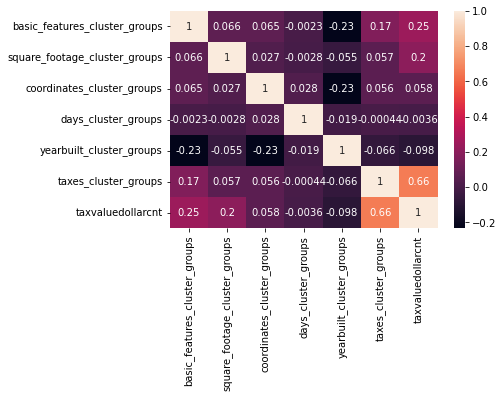

In [284]:
corr = like_only_clusters.corr()
sns.heatmap(corr, annot=True)

index                         1.094472
bathroomcnt                   7.106458
bedroomcnt                    5.549478
sqr_ft                        7.113249
fullbathcnt                   6.670234
latitude                     -0.096041
longitude                     1.096521
lotsizesquarefeet             3.308148
rawcensustractandblock        4.144715
yearbuilt                     6.236277
structuretaxvaluedollarcnt    7.099387
taxvaluedollarcnt             6.062978
landtaxvaluedollarcnt         4.511983
taxamount                     6.020330
censustractandblock           4.156077
elevation                     2.527580
days_since_2016              -0.131492
county_orange_county          2.927593
county_ventura                2.538562
index                         0.131732
logerror                      1.397892
dtype: float64


<AxesSubplot:>

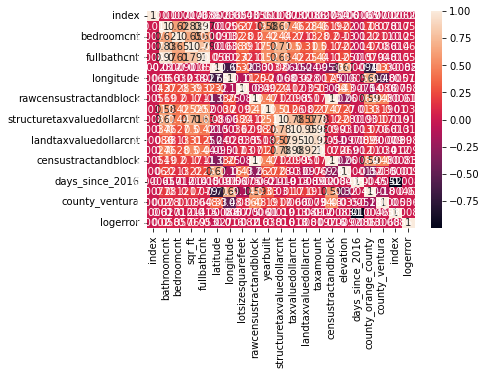

In [302]:
train.head()
corr = train_scaled.corr('spearman')

sns.heatmap(corr, annot = True)

In [304]:
train_scaled.head().drop(columns=['index'])

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,elevation,days_since_2016,county_orange_county,county_ventura,logerror
0,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.000252,0.305344,0.146923,0.151224,0.136425,0.154527,0.000252,0.124436,0.042146,0.0,0.0,0.019189
1,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.000046,0.465649,0.078929,0.078232,0.069779,0.082922,0.000046,0.147516,0.421456,0.0,0.0,0.009457
2,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.000139,0.587786,0.160058,0.161917,0.144597,0.168085,0.000139,0.140492,0.455939,0.0,0.0,-0.015265
3,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.296732,0.732824,0.277014,0.164324,0.089350,0.144334,0.296733,0.052183,0.659004,1.0,0.0,0.017980
4,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.004123,0.549618,0.085028,0.047307,0.024063,0.055851,0.004123,0.074762,0.099617,0.0,0.0,-0.008801


In [357]:
train_scaled['pp_sqr_ft'] = train_scaled.taxvaluedollarcnt / train_scaled.sqr_ft[train_scaled.sqr_ft != 0]
train_scaled.head()

,index,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,landtaxvaluedollarcnt,taxamount,censustractandblock,elevation,days_since_2016,county_orange_county,county_ventura,index,logerror,pp_sqr_ft
0,0,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.000252,0.305344,...,0.136425,0.154527,0.000252,0.124436,0.042146,0.0,0.0,48081,0.019189,0.372794
1,1,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.000046,0.465649,...,0.069779,0.082922,0.000046,0.147516,0.421456,0.0,0.0,27010,0.009457,0.887737
2,2,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.000139,0.587786,...,0.144597,0.168085,0.000139,0.140492,0.455939,0.0,0.0,24623,-0.015265,0.638706
3,3,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.296732,0.732824,...,0.089350,0.144334,0.296733,0.052183,0.659004,1.0,0.0,14340,0.017980,0.318637
4,4,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.004123,0.549618,...,0.024063,0.055851,0.004123,0.074762,0.099617,0.0,0.0,44838,-0.008801,0.351056


In [363]:

train_scaled.isna().sum()
train_scaled = train_scaled.dropna()
train_scaled.isna().sum()

index                         0
bathroomcnt                   0
bedroomcnt                    0
sqr_ft                        0
fullbathcnt                   0
latitude                      0
longitude                     0
lotsizesquarefeet             0
rawcensustractandblock        0
yearbuilt                     0
structuretaxvaluedollarcnt    0
taxvaluedollarcnt             0
landtaxvaluedollarcnt         0
taxamount                     0
censustractandblock           0
elevation                     0
days_since_2016               0
county_orange_county          0
county_ventura                0
index                         0
logerror                      0
pp_sqr_ft                     0
dtype: int64

In [377]:
area_to_ppsqrft = ['latitude', 'longitude', 'elevation', 'pp_sqr_ft']
kmeans = KMeans(n_clusters=5)
print(train_scaled[area_to_ppsqrft].dropna().info())
kmeans.fit(train_scaled[area_to_ppsqrft])

train_scaled['area_to_ppsqrft'] = kmeans.predict(train_scaled[area_to_ppsqrft])
train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27814 entries, 0 to 27814
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   27814 non-null  float64
 1   longitude  27814 non-null  float64
 2   elevation  27814 non-null  float64
 3   pp_sqr_ft  27814 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB
None


,index,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,taxamount,censustractandblock,elevation,days_since_2016,county_orange_county,county_ventura,index,logerror,pp_sqr_ft,area_to_ppsqrft
0,0,0.444444,0.6,0.405651,0.50,0.596649,0.539088,0.033466,0.000252,0.305344,...,0.154527,0.000252,0.124436,0.042146,0.0,0.0,48081,0.019189,0.372794,3
1,1,0.000000,0.2,0.088125,0.00,0.616556,0.541647,0.024850,0.000046,0.465649,...,0.082922,0.000046,0.147516,0.421456,0.0,0.0,27010,0.009457,0.887737,0
2,2,0.222222,0.6,0.253507,0.25,0.618695,0.504846,0.027084,0.000139,0.587786,...,0.168085,0.000139,0.140492,0.455939,0.0,0.0,24623,-0.015265,0.638706,3
3,3,0.444444,0.4,0.515708,0.50,0.127372,0.941729,0.093806,0.296732,0.732824,...,0.144334,0.296733,0.052183,0.659004,1.0,0.0,14340,0.017980,0.318637,1
4,4,0.222222,0.4,0.134756,0.25,0.513800,0.809731,0.023570,0.004123,0.549618,...,0.055851,0.004123,0.074762,0.099617,0.0,0.0,44838,-0.008801,0.351056,1


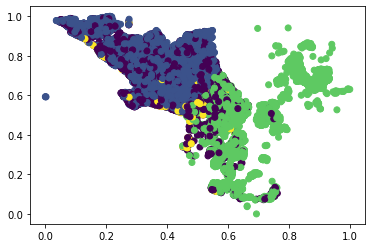

In [378]:
plt.scatter(train_scaled.latitude, train_scaled.longitude, c=train_scaled.area_to_ppsqrft)

In [380]:
train_scaled.sort_values(by='pp_sqr_ft', ascending=False)

,index,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,taxamount,censustractandblock,elevation,days_since_2016,county_orange_county,county_ventura,index,logerror,pp_sqr_ft,area_to_ppsqrft
17722,17722,0.000000,0.0,0.011460,0.00,0.185783,0.800169,0.006906,0.297159,0.351145,...,0.453189,0.297159,0.002509,0.206897,1.0,0.0,39271,0.089654,44.020866,2
21393,21393,0.000000,0.0,0.022920,0.00,0.447545,0.515557,0.007666,0.008132,0.297710,...,0.354731,0.008132,0.009032,0.337165,0.0,0.0,31727,-0.149803,15.528484,4
3441,3441,0.000000,0.0,0.026477,0.00,0.140633,0.870820,0.014359,0.297146,0.480916,...,0.335472,0.297146,0.022077,0.245211,1.0,0.0,37108,0.039095,13.022948,4
19550,19550,0.000000,0.0,0.053547,0.00,0.468500,0.491632,0.020319,0.002188,0.511450,...,0.656852,0.002188,0.016558,0.969349,0.0,0.0,1030,-0.065773,12.228405,4
11175,11175,0.000000,0.0,0.030429,0.00,0.125032,0.891062,0.008798,0.297146,0.404580,...,0.306975,0.297147,0.081284,0.367816,1.0,0.0,29912,0.060237,11.024840,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,965,0.000000,0.6,0.321280,0.00,0.473574,0.598617,0.014947,0.001626,0.190840,...,0.011112,0.001626,0.032614,0.659004,0.0,0.0,14371,-0.052676,0.024779,1
5080,5080,0.222222,0.6,0.345781,0.25,0.834082,0.752190,0.022722,0.010954,0.916031,...,0.070265,0.010954,0.406422,0.068966,0.0,0.0,46998,0.050946,0.024021,3
24781,24781,0.222222,0.6,0.496147,0.25,0.395243,0.634020,0.020573,0.005948,0.312977,...,0.029184,0.005948,0.016056,0.720307,0.0,0.0,11005,-0.038890,0.022430,1
2439,2439,0.444444,0.4,0.427583,0.50,0.539825,0.521462,0.179152,0.000548,0.610687,...,0.186377,0.000548,0.169092,0.068966,0.0,0.0,46901,0.100271,0.008030,3


In [381]:
wr.add_dist_cols(train)
train.head()


,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,dist_from_malibu,dist_from_bel_air,dist_balboa_island,dist_laguna_beach,dist_seal_beach,dist_simi,dist_ventura,dist_channel_islands,dist_ojai,dist_eleanor
48081,11031387,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,60371197,1925.0,...,39.157457,13.915851,84.063790,96.015761,61.158843,33.017687,80.117403,10349.659647,79.083101,40.748301
27010,11023688,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,60371045,1946.0,...,41.416807,17.200949,86.477233,98.324431,63.817747,33.106009,80.354911,10347.639861,78.529511,42.063435
24623,11056051,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,60371114,1962.0,...,36.754252,17.476721,90.532864,102.587777,67.320824,26.677349,73.926637,10342.898251,72.283897,36.133551
14340,14409471,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,60590320,1981.0,...,117.024626,97.051998,23.218077,11.280906,47.093767,131.913662,172.199647,10453.979665,177.865759,129.182671
44838,12915171,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,60374058,1957.0,...,80.265019,50.247956,54.717944,63.010176,43.516880,82.051520,128.722260,10392.356023,128.220035,86.977746


In [ ]:
dist_columns = [x for x in train.columns if 'dist' in x]
dist_columns

In [383]:
for dist in dist_columns:
    train[f'hypotenuse_{dist}'] = (train.elevation ** 2 + train[dist] ** 2) ** (1/2)
train.head()

,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
48081,11031387,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,60371197,1925.0,...,250.084599,247.391695,260.913244,265.005710,254.459042,249.197046,259.668632,10352.606619,259.351377,250.338619
27010,11023688,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,60371045,1946.0,...,295.912744,293.504468,305.495191,309.057752,299.869480,294.864389,303.818880,10351.787270,303.341201,296.003940
24623,11056051,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,60371114,1962.0,...,281.410510,279.546840,293.320984,297.262934,287.007131,280.272512,288.628044,10346.660584,288.211661,281.330115
14340,14409471,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,60590320,1981.0,...,155.896642,141.520636,105.584464,103.615920,113.255564,167.362523,200.653229,10454.487067,205.536440,165.218529
44838,12915171,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,60374058,1957.0,...,168.364109,156.297335,157.791170,160.854848,154.265093,169.223083,196.146425,10393.409821,195.817204,171.665746


In [384]:
for col in train.columns:
    if 'hypotenuse' not in col and 'dist' in col:
        train = train.drop(columns=col)
        
train.head()

,parcelid,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,yearbuilt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
48081,11031387,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,60371197,1925.0,...,250.084599,247.391695,260.913244,265.005710,254.459042,249.197046,259.668632,10352.606619,259.351377,250.338619
27010,11023688,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,60371045,1946.0,...,295.912744,293.504468,305.495191,309.057752,299.869480,294.864389,303.818880,10351.787270,303.341201,296.003940
24623,11056051,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,60371114,1962.0,...,281.410510,279.546840,293.320984,297.262934,287.007131,280.272512,288.628044,10346.660584,288.211661,281.330115
14340,14409471,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,60590320,1981.0,...,155.896642,141.520636,105.584464,103.615920,113.255564,167.362523,200.653229,10454.487067,205.536440,165.218529
44838,12915171,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,60374058,1957.0,...,168.364109,156.297335,157.791170,160.854848,154.265093,169.223083,196.146425,10393.409821,195.817204,171.665746


In [385]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'sqr_ft', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustractandblock',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'elevation', 'days_since_2016',
       'county_orange_county', 'county_ventura', 'county',
       'hypotenuse_dist_from_la', 'hypotenuse_dist_from_long_beach',
       'hypotenuse_dist_santa_monica', 'hypotenuse_dist_from_malibu',
       'hypotenuse_dist_from_bel_air', 'hypotenuse_dist_balboa_island',
       'hypotenuse_dist_laguna_beach', 'hypotenuse_dist_seal_beach',
       'hypotenuse_dist_simi', 'hypotenuse_dist_ventura',
       'hypotenuse_dist_channel_islands', 'hypotenuse_dist_ojai',
       'hypotenuse_dist_eleanor'],
      dtype='object')

In [403]:
scale = train.drop(columns=['parcelid', 'rawcensustractandblock', 'censustractandblock', 'transactiondate'])

In [404]:
scale.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
48081,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,1925.0,157000.0,448000.0,...,250.084599,247.391695,260.913244,265.005710,254.459042,249.197046,259.668632,10352.606619,259.351377,250.338619
27010,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,1946.0,84411.0,233331.0,...,295.912744,293.504468,305.495191,309.057752,299.869480,294.864389,303.818880,10351.787270,303.341201,296.003940
24623,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,1962.0,171023.0,479446.0,...,281.410510,279.546840,293.320984,297.262934,287.007131,280.272512,288.628044,10346.660584,288.211661,281.330115
14340,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,1981.0,295883.0,486526.0,...,155.896642,141.520636,105.584464,103.615920,113.255564,167.362523,200.653229,10454.487067,205.536440,165.218529
44838,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,1957.0,90922.0,142382.0,...,168.364109,156.297335,157.791170,160.854848,154.265093,169.223083,196.146425,10393.409821,195.817204,171.665746


In [405]:
los_angeles = scale[scale.county=='los_angeles']
los_angeles.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
48081,3.0,4.0,2379.0,3.0,34.222798,-118.427490,10141.0,1925.0,157000.0,448000.0,...,250.084599,247.391695,260.913244,265.005710,254.459042,249.197046,259.668632,10352.606619,259.351377,250.338619
27010,1.0,2.0,772.0,1.0,34.252212,-118.422645,7591.0,1946.0,84411.0,233331.0,...,295.912744,293.504468,305.495191,309.057752,299.869480,294.864389,303.818880,10351.787270,303.341201,296.003940
24623,2.0,4.0,1609.0,2.0,34.255372,-118.492336,8252.0,1962.0,171023.0,479446.0,...,281.410510,279.546840,293.320984,297.262934,287.007131,280.272512,288.628044,10346.660584,288.211661,281.330115
44838,2.0,3.0,1008.0,2.0,34.100386,-117.914960,7212.0,1957.0,90922.0,142382.0,...,168.364109,156.297335,157.791170,160.854848,154.265093,169.223083,196.146425,10393.409821,195.817204,171.665746
32411,2.0,3.0,1370.0,2.0,34.322245,-118.454726,5517.0,1953.0,212525.0,323614.0,...,425.332586,423.716722,433.444317,436.159664,429.097180,424.108951,430.031190,10348.670608,429.392185,425.124621


In [406]:
orange_county = scale[scale.county=='orange_county']
orange_county.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
14340,3.0,3.0,2936.0,3.0,33.529421,-117.664988,28000.0,1981.0,295883.0,486526.0,...,155.896642,141.520636,105.584464,103.615920,113.255564,167.362523,200.653229,10454.487067,205.536440,165.218529
15809,4.0,5.0,3899.0,4.0,33.573120,-117.684071,17600.0,1987.0,429785.0,1224326.0,...,172.387162,159.591556,131.550023,130.383750,137.008314,182.105519,212.670069,10450.069364,216.911322,180.464737
24798,2.5,3.0,1905.0,2.0,33.606253,-117.677136,2375.0,1978.0,169320.0,251480.0,...,171.721993,158.568006,131.593178,130.578411,136.739219,180.927683,211.773779,10447.871348,215.702554,179.604452
17226,2.5,5.0,2167.0,2.0,33.853050,-117.900610,6150.0,1954.0,89747.0,418069.0,...,99.449477,79.592405,60.490523,64.923301,58.539781,107.991168,147.378814,10413.126040,150.313837,108.172704
49202,3.0,4.0,3204.0,3.0,33.702996,-117.713644,4487.0,2013.0,594038.0,1195282.0,...,188.849259,177.056475,158.275806,158.143724,161.187782,195.784612,223.797778,10438.169621,226.719665,195.253179


In [407]:
ventura = scale[scale.county=='ventura']
ventura.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
42856,2.0,3.0,1632.0,2.0,34.253551,-118.767726,9345.0,1965.0,201595.0,403190.0,...,268.193796,269.046166,287.936074,292.850240,279.762886,267.008802,271.388009,10328.714564,271.413860,267.447520
6414,1.5,3.0,1401.0,1.0,34.443440,-119.250194,5850.0,1957.0,166433.0,527043.0,...,242.444438,248.007224,281.023416,288.189125,268.314627,238.721434,234.732420,10281.723870,234.001507,239.239359
15196,2.0,3.0,1462.0,2.0,34.169136,-118.821055,7854.0,1971.0,251000.0,718000.0,...,306.435853,307.906888,323.766544,328.099163,316.654663,306.223745,309.340607,10333.011497,310.001138,306.040635
24307,2.0,4.0,1393.0,2.0,34.265459,-119.174577,6000.0,1964.0,194744.0,324572.0,...,68.064225,85.337638,147.916737,159.797183,125.485622,62.543101,52.208644,10298.091665,55.231621,60.555416
24676,2.0,3.0,1826.0,2.0,34.227953,-119.033945,7931.0,1977.0,198989.0,568540.0,...,62.136577,76.258693,136.381950,148.075346,114.422490,58.059290,58.471747,10310.179887,61.437102,56.401141


In [408]:
scaler_ventura = MinMaxScaler()
scaler_ventura.fit(ventura.drop(columns='county'))

scaler_los_angeles = MinMaxScaler()
scaler_los_angeles.fit(los_angeles.drop(columns='county'))

scaler_orange_county = MinMaxScaler()
scaler_orange_county.fit(orange_county.drop(columns='county'))

MinMaxScaler()

In [409]:
ventura_scaled= pd.DataFrame(scaler_ventura.transform(ventura.drop(columns='county')),columns = ventura.drop(columns='county').columns)
los_angeles_scaled = pd.DataFrame(scaler_los_angeles.transform(los_angeles.drop(columns='county')),columns = los_angeles.drop(columns='county').columns)
orange_county_scaled = pd.DataFrame(scaler_orange_county.transform(orange_county.drop(columns='county')),columns = orange_county.drop(columns='county').columns)

ventura_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
0,0.222222,0.4,0.235872,0.25,0.484688,0.833550,0.031213,0.606299,0.204200,0.149212,...,0.457194,0.430444,0.380349,0.371957,0.397231,0.456718,0.494111,0.748578,0.481937,0.466027
1,0.111111,0.4,0.188575,0.00,0.942589,0.242715,0.019237,0.543307,0.166683,0.197637,...,0.405922,0.386304,0.363945,0.360635,0.371237,0.400459,0.425949,0.124960,0.410655,0.410878
2,0.222222,0.4,0.201065,0.25,0.281128,0.768243,0.026104,0.653543,0.256913,0.272299,...,0.533342,0.511973,0.465380,0.457577,0.480998,0.534709,0.564684,0.805603,0.555457,0.541478
3,0.222222,0.6,0.186937,0.25,0.513403,0.335316,0.019751,0.598425,0.196890,0.118473,...,0.058694,0.045025,0.048063,0.048770,0.046930,0.050072,0.086544,0.342178,0.070046,0.061544
4,0.222222,0.4,0.275594,0.25,0.422960,0.507536,0.026368,0.700787,0.201419,0.213862,...,0.046891,0.025977,0.020689,0.020298,0.021810,0.041155,0.098190,0.502602,0.081869,0.053422


In [410]:
ventura_dist = ['dist_simi', 'dist_ojai', 'dist_eleanor',
                    'dist_ventura', 'dist_channel_islands']

for col in ventura_scaled.columns:
    if 'dist' in col and 'hypotenuse' not in col:
        ventura_scaled = ventura_scaled.drop(columns=col)
        
ventura_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
0,0.222222,0.4,0.235872,0.25,0.484688,0.833550,0.031213,0.606299,0.204200,0.149212,...,0.457194,0.430444,0.380349,0.371957,0.397231,0.456718,0.494111,0.748578,0.481937,0.466027
1,0.111111,0.4,0.188575,0.00,0.942589,0.242715,0.019237,0.543307,0.166683,0.197637,...,0.405922,0.386304,0.363945,0.360635,0.371237,0.400459,0.425949,0.124960,0.410655,0.410878
2,0.222222,0.4,0.201065,0.25,0.281128,0.768243,0.026104,0.653543,0.256913,0.272299,...,0.533342,0.511973,0.465380,0.457577,0.480998,0.534709,0.564684,0.805603,0.555457,0.541478
3,0.222222,0.6,0.186937,0.25,0.513403,0.335316,0.019751,0.598425,0.196890,0.118473,...,0.058694,0.045025,0.048063,0.048770,0.046930,0.050072,0.086544,0.342178,0.070046,0.061544
4,0.222222,0.4,0.275594,0.25,0.422960,0.507536,0.026368,0.700787,0.201419,0.213862,...,0.046891,0.025977,0.020689,0.020298,0.021810,0.041155,0.098190,0.502602,0.081869,0.053422


In [414]:
oc_dist = ['dist_balboa_island', 'dist_laguna_beach',
               'dist_seal_beach']

for col in orange_county_scaled.columns:
    if 'dist' in col and 'hypotenuse' not in col:
        orange_county_scaled = orange_county_scaled.drop(columns=col)


orange_county_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
0,0.444444,0.4,0.510809,0.50,0.245339,0.801658,0.093058,0.716667,0.273036,0.162461,...,0.150624,0.156668,0.164392,0.148584,0.172750,0.149600,0.143760,0.780972,0.144920,0.148976
1,0.666667,0.8,0.703563,0.75,0.324523,0.767359,0.057891,0.766667,0.399265,0.415872,...,0.179301,0.187219,0.205386,0.191499,0.210351,0.175784,0.166352,0.715497,0.166471,0.175948
2,0.333333,0.4,0.304444,0.25,0.384560,0.779824,0.006408,0.691667,0.153726,0.081730,...,0.178144,0.185489,0.205454,0.191811,0.209925,0.173692,0.164667,0.682920,0.164181,0.174426
3,0.333333,0.8,0.356886,0.25,0.831760,0.378162,0.019173,0.491667,0.078712,0.138948,...,0.052464,0.051972,0.093199,0.086552,0.086135,0.044157,0.043599,0.167960,0.040292,0.048058
4,0.444444,0.6,0.564452,0.50,0.559860,0.714206,0.013550,0.983333,0.554106,0.405897,...,0.207928,0.216746,0.247580,0.236004,0.248627,0.200078,0.187273,0.539131,0.185054,0.202110


In [415]:
la_dist = ['dist_from_la', 'dist_from_long_beach',
                 'dist_santa_monica', 'dist_from_malibu',
                 'dist_from_bel_air']

for col in los_angeles_scaled.columns:
    if 'dist' in col and 'hypotenuse' not in col:
        los_angeles_scaled = los_angeles_scaled.drop(columns=col)
        
los_angeles_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
0,0.50,0.6,0.405651,0.50,0.596649,0.380577,0.031800,0.305344,0.146923,0.151224,...,0.116866,0.118448,0.119490,0.115903,0.126996,0.109406,0.103892,0.131082,0.099825,0.114661
1,0.00,0.2,0.088125,0.00,0.616556,0.384521,0.022991,0.465649,0.078929,0.078232,...,0.140060,0.141728,0.142141,0.138426,0.149790,0.132708,0.126657,0.127889,0.122611,0.137832
2,0.25,0.6,0.253507,0.25,0.618695,0.327798,0.025274,0.587786,0.160058,0.161917,...,0.132721,0.134681,0.135956,0.132396,0.143334,0.125262,0.118824,0.107914,0.114774,0.130386
3,0.25,0.4,0.134756,0.25,0.513800,0.797736,0.021681,0.549618,0.085028,0.047307,...,0.075505,0.072459,0.067095,0.062651,0.076702,0.068601,0.071139,0.290068,0.066917,0.074742
4,0.25,0.4,0.206283,0.25,0.663954,0.358409,0.015826,0.519084,0.198933,0.108930,...,0.205563,0.207466,0.207150,0.203413,0.214658,0.198653,0.191733,0.115745,0.187901,0.203349


In [426]:
for col in orange_county_scaled.columns:
    if col[len('hypotenuse_'):] in la_dist or col[len('hypotenuse_d'):] in ventura_dist:
        orange_county_scaled=orange_county_scaled.drop(columns=col)
    
orange_county_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,elevation,days_since_2016,county_orange_county,county_ventura,hypotenuse_dist_balboa_island,hypotenuse_dist_laguna_beach,hypotenuse_dist_seal_beach
0,0.444444,0.4,0.510809,0.50,0.245339,0.801658,0.093058,0.716667,0.273036,0.162461,0.088093,0.150069,0.498840,0.162461,0.657692,0.0,0.0,0.164392,0.148584,0.172750
1,0.666667,0.8,0.703563,0.75,0.324523,0.767359,0.057891,0.766667,0.399265,0.415872,0.374524,0.372218,0.508500,0.205047,0.619231,0.0,0.0,0.205386,0.191499,0.210351
2,0.333333,0.4,0.304444,0.25,0.384560,0.779824,0.006408,0.691667,0.153726,0.081730,0.036639,0.073151,0.481181,0.205047,0.453846,0.0,0.0,0.205454,0.191811,0.209925
3,0.333333,0.8,0.356886,0.25,0.831760,0.378162,0.019173,0.491667,0.078712,0.138948,0.153394,0.147347,0.510179,0.085174,0.592308,0.0,0.0,0.093199,0.086552,0.086135
4,0.444444,0.6,0.564452,0.50,0.559860,0.714206,0.013550,0.983333,0.554106,0.405897,0.282842,0.529353,0.504122,0.247634,0.015385,0.0,0.0,0.247580,0.236004,0.248627


In [429]:
for col in los_angeles_scaled.columns:
    if col[len('hypotenuse_'):] in oc_dist or col[len('hypotenuse_'):] in ventura_dist:
        los_angeles_scaled=los_angeles_scaled.drop(columns=col)
    
los_angeles_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,logerror,elevation,days_since_2016,county_orange_county,county_ventura,hypotenuse_dist_from_la,hypotenuse_dist_from_long_beach,hypotenuse_dist_santa_monica,hypotenuse_dist_from_malibu,hypotenuse_dist_from_bel_air
0,0.50,0.6,0.405651,0.50,0.596649,0.380577,0.031800,0.305344,0.146923,0.151224,...,0.499278,0.123996,0.042146,0.0,0.0,0.116901,0.124463,0.122057,0.116866,0.118448
1,0.00,0.2,0.088125,0.00,0.616556,0.384521,0.022991,0.465649,0.078929,0.078232,...,0.491275,0.147088,0.421456,0.0,0.0,0.140187,0.147405,0.145244,0.140060,0.141728
2,0.25,0.6,0.253507,0.25,0.618695,0.327798,0.025274,0.587786,0.160058,0.161917,...,0.470945,0.140060,0.455939,0.0,0.0,0.133368,0.140812,0.138214,0.132721,0.134681
3,0.25,0.4,0.134756,0.25,0.513800,0.797736,0.021681,0.549618,0.085028,0.047307,...,0.476260,0.074297,0.099617,0.0,0.0,0.067833,0.074998,0.076508,0.075505,0.072459
4,0.25,0.4,0.206283,0.25,0.663954,0.358409,0.015826,0.519084,0.198933,0.108930,...,0.494736,0.212349,0.325670,0.0,0.0,0.206091,0.212540,0.210694,0.205563,0.207466


In [430]:
for col in ventura_scaled.columns:
    if col[len('hypotenuse_'):] in oc_dist or col[len('hypotenuse_'):] in la_dist:
        ventura_scaled=ventura_scaled.drop(columns=col)
    
ventura_scaled.head()

,bathroomcnt,bedroomcnt,sqr_ft,fullbathcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,logerror,elevation,days_since_2016,county_orange_county,county_ventura,hypotenuse_dist_simi,hypotenuse_dist_ventura,hypotenuse_dist_channel_islands,hypotenuse_dist_ojai,hypotenuse_dist_eleanor
0,0.222222,0.4,0.235872,0.25,0.484688,0.833550,0.031213,0.606299,0.204200,0.149212,...,0.484624,0.495379,0.118110,0.0,0.0,0.456718,0.494111,0.748578,0.481937,0.466027
1,0.111111,0.4,0.188575,0.00,0.942589,0.242715,0.019237,0.543307,0.166683,0.197637,...,0.492682,0.434381,0.826772,0.0,0.0,0.400459,0.425949,0.124960,0.410655,0.410878
2,0.222222,0.4,0.201065,0.25,0.281128,0.768243,0.026104,0.653543,0.256913,0.272299,...,0.475445,0.567468,0.633858,0.0,0.0,0.534709,0.564684,0.805603,0.555457,0.541478
3,0.222222,0.6,0.186937,0.25,0.513403,0.335316,0.019751,0.598425,0.196890,0.118473,...,0.395987,0.096118,0.464567,0.0,0.0,0.050072,0.086544,0.342178,0.070046,0.061544
4,0.222222,0.4,0.275594,0.25,0.422960,0.507536,0.026368,0.700787,0.201419,0.213862,...,0.499317,0.099815,0.448819,0.0,0.0,0.041155,0.098190,0.502602,0.081869,0.053422


In [433]:
lm = LinearRegression(normalize=True)
target= 'logerror'

x_train = los_angeles.drop(columns=['county', target])
y_train = los_angeles[target]


lm.fit(x_train, y_train)

# predict train
y_train_pred = lm.predict(x_train)
#y_val_pred = lm.predict(x_validate)

y_train_pred = pd.DataFrame(y_train_pred)
#print(y_train_pred)
y_train_pred['mean'] = y_train.mean()

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_pred[0])**(1/2)
rmse_baseline = mean_squared_error(y_train, y_train_pred['mean'])**(1/2)


rmse_train, rmse_baseline

(0.1032636712589931, 0.10391632571847269)

In [434]:
lm = LinearRegression(normalize=True)
target= 'logerror'
#validate_scaled =validate_scaled.drop(columns='transactiondate')

x_train = ventura.drop(columns=['county', target])
y_train = ventura[target]





#X_test = test.drop(columns=drop_cols(cols_to_drop, 
                                   #  test, 
                                    # target_var))
#Y_test = test[target_var]

# fit the model to our training data. We must specify the column in self.y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train)

# predict train
y_train_pred = lm.predict(x_train)
#y_val_pred = lm.predict(x_validate)

y_train_pred = pd.DataFrame(y_train_pred)
#print(y_train_pred)
y_train_pred['mean'] = y_train.mean()

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_pred[0])**(1/2)
rmse_baseline = mean_squared_error(y_train, y_train_pred['mean'])**(1/2)

#y_val = validate_scaled[target]
#y_val = pd.DataFrame(y_val)

#y_val['mean'] = y_train.mean()
#rmse_baseline = mean_squared_error(y_val['mean'], y_val_pred) ** (1/2)


# predict validate
#self.y_validate['TVDC_pred_OLS'] = lm.predict(x_validate)

# evaluate: rmse
#rmse_validate = mean_squared_error(self.y_validate.logerror, self.y_validate.TVDC_pred_OLS)**(1/2)

#model_stats = self.make_model_stats(model_name, rmse_train, rmse_validate,
                     # x_train)
#self.OLS = pd.concat([self.OLS, model_stats], ignore_index=True)

#return model_stats

rmse_train, rmse_baseline

(0.08205913576074181, 0.08295014247661485)

In [435]:
lm = LinearRegression(normalize=True)
target= 'logerror'
#validate_scaled =validate_scaled.drop(columns='transactiondate')

x_train = orange_county.drop(columns=['county', target])
y_train = orange_county[target]





#X_test = test.drop(columns=drop_cols(cols_to_drop, 
                                   #  test, 
                                    # target_var))
#Y_test = test[target_var]

# fit the model to our training data. We must specify the column in self.y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train)

# predict train
y_train_pred = lm.predict(x_train)
#y_val_pred = lm.predict(x_validate)

y_train_pred = pd.DataFrame(y_train_pred)
#print(y_train_pred)
y_train_pred['mean'] = y_train.mean()

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_pred[0])**(1/2)
rmse_baseline = mean_squared_error(y_train, y_train_pred['mean'])**(1/2)

#y_val = validate_scaled[target]
#y_val = pd.DataFrame(y_val)

#y_val['mean'] = y_train.mean()
#rmse_baseline = mean_squared_error(y_val['mean'], y_val_pred) ** (1/2)


# predict validate
#self.y_validate['TVDC_pred_OLS'] = lm.predict(x_validate)

# evaluate: rmse
#rmse_validate = mean_squared_error(self.y_validate.logerror, self.y_validate.TVDC_pred_OLS)**(1/2)

#model_stats = self.make_model_stats(model_name, rmse_train, rmse_validate,
                     # x_train)
#self.OLS = pd.concat([self.OLS, model_stats], ignore_index=True)

#return model_stats

rmse_train, rmse_baseline

(0.08445905235238124, 0.084737175495982)

In [464]:
los_angeles_scaled['pp_sqr_ft'] = los_angeles_scaled.taxvaluedollarcnt / los_angeles_scaled.sqr_ft[los_angeles_scaled.sqr_ft>0]
los_angeles_scaled['pp_sqr_ft'] = los_angeles_scaled.dropna()

ValueError: Columns must be same length as key

In [465]:
fig = plt.figure()
kmeans = KMeans(n_clusters=5)
kmeans.fit(np.array(los_angeles_scaled.pp_sqr_ft.dropna()).reshape(-1,1))

los_angeles_scaled['ppsqr_ft_clusters'] = kmeans.predict(np.array(los_angeles_scaled.pp_sqr_ft.dropna()).reshape(-1,1))

ax = fig.add_subplot(111, projection='3d')
x = np.array(los_angeles_scaled.latitude)
y = np.array(los_angeles_scaled.longitude)
z = np.array(los_angeles_scaled.elevation)


ax.scatter(x,y,z, marker='s', c=np.array(los_angeles_scaled.ppsqr_ft_clusters).reshape(-1,1), s=40, alpha=.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 300, c = 'black',
           marker='*', label = 'Centroid', alpha=.8)


ax.set_ylabel('age')
ax.set_xlabel('annual_income')
ax.set_zlabel('spending_score')
# rotate the axes and update
    

ValueError: Length of values (17940) does not match length of index (17941)

<Figure size 432x288 with 0 Axes>